In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 分类图
## pcolormesh(矩形网格背景)
- 使用非规则矩形网格创建伪颜色图；
- 网格化的颜色图，可以通对背景的定义，可以直观的表现出分类边界；
### 决策树分类样例

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
# 使用经典的鸢尾花数据
inputdata = datasets.load_iris()
iris_feature = ['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度']
target_name = inputdata.target_names.tolist()
# 取花萼长度和花瓣长度做为特征，训练决策树模型
x_train, x_test, y_train, y_test = train_test_split(inputdata.data[:,[0,2]], inputdata.target, test_size = 0.2, random_state=0)
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)

In [5]:
# 随机采样，生成花萼长度和花瓣长度数据，
# 蒙特卡洛思想，随机模拟大量不同长度下的分类结果，作为分类背景
N, M = 500, 500  # 横纵各采样500个值，共250000个数据
x1_min, x2_min = x_train.min(axis=0)# 在已有数据大小范围内生成
x1_max, x2_max = x_train.max(axis=0)
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 转换成下x,y坐标形式，生成网格采样点
x_show = np.stack((x1.flatten(), x2.flatten()), axis=1)  # x,y坐标位置分别对应输入两个变量
# 使用拟合模型验证
y_predict = model.predict(x_show)

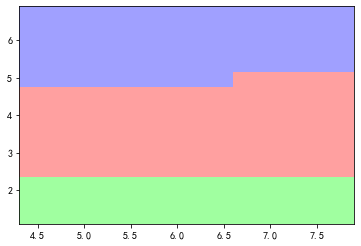

In [7]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
# 设置colormap
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
# 利用pcolormesh绘制网格颜色
plt.pcolormesh(x1, x2, y_predict.reshape(x1.shape), cmap=cm_light)

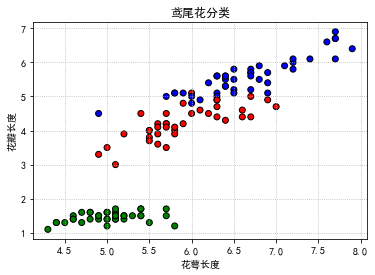

In [8]:
# 绘制散点图
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_dark,marker='o',edgecolors='k')
plt.xlabel('花萼长度')
plt.ylabel('花瓣长度')
plt.title('鸢尾花分类')
plt.grid(True,ls=':')